In [ ]:
#Question No. 1     Dataset:- 'forestfires.csv'
#Predict the burned area of forest fires with NEURAL NETWORKS


In [ ]:
#Applying the Feature Engineering for selecting important feature for build the Neural Network model

####Univariate feature selection

In [ ]:
#Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#load data
filename = 'forestfires.csv'
names = ['month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','dayfri','daymon','daysat',
         'daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul',
         'monthjun','monthmar','monthmay','monthnov','monthoct','monthsep','size_category']
dataframe = read_csv(filename, names=names, header=0)
dataframe

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
dataframe.dtypes 

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [ ]:
dataframe[['month','day','size_category']]= dataframe[['month','day','size_category']].apply(lambda x: pd.factorize(x) [0])

In [ ]:
dataframe

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,2,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,2,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=dataframe.iloc[:,0:-1] 
X 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,2,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,2,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataframe.iloc[:,-1] 
Y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [ ]:
#feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
#summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)


#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif

[7.301e+00 1.085e+00 8.443e-02 2.301e+01 2.187e+01 9.054e-02 3.339e-02
 6.350e+00 1.441e+00 5.216e+00 1.577e+04 2.055e-01 5.513e-02 7.066e-01
 1.139e-01 9.643e-01 6.201e-01 2.172e-01 9.958e-02 1.157e+00 1.760e+01
 9.867e-02 7.354e-01 2.499e-02 7.382e-01 5.975e-01 5.436e-01 3.677e-01
 3.667e-04 6.691e-01]


####Recursive Feature Elimination

In [ ]:
#Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#load data
filename = 'forestfires.csv'
names = ['month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','dayfri','daymon','daysat',
         'daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul',
         'monthjun','monthmar','monthmay','monthnov','monthoct','monthsep','size_category']
dataframe = read_csv(filename, names=names, header=0)

In [ ]:
dataframe[['month','day','size_category']]= dataframe[['month','day','size_category']].apply(lambda x: pd.factorize(x) [0])

In [ ]:
dataframe

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,2,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,2,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=dataframe.iloc[:,0:-1] 
X 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,2,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,2,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataframe.iloc[:,-1] 
Y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [ ]:
#feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(X, Y)
import matplotlib.pyplot as plt
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
#Num Features: 
fit.n_features_

15

In [ ]:
#Selected Features:
fit.support_

array([False, False,  True, False, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True, False,  True, False,
       False,  True,  True])

In [ ]:
#Feature Ranking:
fit.ranking_

array([ 7,  5,  1, 11, 13,  1,  2,  3, 12, 14,  1,  1,  4,  1,  1,  1,  1,
        1,  8,  6,  1,  1, 10,  1,  9,  1, 15, 16,  1,  1])

####Feature Importance using Decision Tree

In [ ]:
#Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.tree import  DecisionTreeClassifier
#load data
filename = 'forestfires.csv'
names = ['month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','dayfri','daymon','daysat',
         'daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul',
         'monthjun','monthmar','monthmay','monthnov','monthoct','monthsep','size_category']
dataframe = read_csv(filename, names=names, header=0)

In [ ]:
dataframe[['month','day','size_category']]= dataframe[['month','day','size_category']].apply(lambda x: pd.factorize(x) [0])

In [ ]:
dataframe

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,2,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,2,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=dataframe.iloc[:,0:-1] 
X 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,2,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,2,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,2,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataframe.iloc[:,-1] 
Y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [ ]:
#feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


#### Build a NEURAL NETWORKS model for Predict the burned area of forest fires by using only important feature which we have got from Feature Engineering technique

In [ ]:
# Importing the necessary packages
from pandas import read_csv
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler 

In [ ]:
# load forestfires dataset
filename = 'forestfires.csv'
names = ['month','RH','DC','DMC','area','size_category']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values 
dataframe 

month  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      1   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0      0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      1   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0      1   
...                                                                                ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0      0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0      0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0      0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0      0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      0   

                                                                                 RH  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   

                                                                                 DC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   1   

                                                                                 DMC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0    1   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0    1   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0    0   
...                                                                              ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
    sat 94.4 146.0 614.7 11.3 

In [ ]:
dataframe[['month','size_category']]= dataframe[['month','size_category']].apply(lambda x: pd.factorize(x) [0])

In [ ]:
dataframe

month  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      1   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0      1   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0      0   
...                                                                                ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0      1   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0      1   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0      1   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0      1   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      1   

                                                                                 RH  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   

                                                                                 DC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   1   

                                                                                 DMC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0    1   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0    1   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0    0   
...                                                                              ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
    sat 94.4 146.0 614.7 11.3 

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 517 entries, ('mar', 'fri', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) to ('nov', 'tue', 79.5, 3.0, 106.7, 1.1, 11.8, 31, 4.5, 0.0, 0.0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   month          517 non-null    int64
 1   RH             517 non-null    int64
 2   DC             517 non-null    int64
 3   DMC            517 non-null    int64
 4   area           517 non-null    int64
 5   size_category  517 non-null    int64
dtypes: int64(6)
memory usage: 90.5+ KB


In [ ]:
X = array[:,0:5]
y = array[:,5]

In [ ]:
X

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=object)

In [ ]:
y

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [ ]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X) 

####Tuning of Hyperparameters :- Batch Size and Epochs

In [ ]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [ ]:
# create model
def create_model():
    model = Sequential()
#No. of neurons in input layer= 12 & input_dimension= No.of independent variables=5   
    model.add(Dense(12, input_dim=5, kernel_initializer='random_uniform', activation='relu'))
#No. of neurons in hidden layer= 8    
    model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
#No. of neurons in output layer    
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
#Optimizers= Adam & learning rate(lr= 0.01)    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]# Find out what is the best batch size among this list[10,20,40]
epochs = [10,50,100]# Find out what is best epochs value among this list[10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   1.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.750 total time=   2.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.524 total time=   2.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.680 total time=   2.0s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.699 total time=   2.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=1.000 total time=   5.6s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.750 total time=   5.8s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.524 total time=   5.8s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.680 total time=   5.8s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.699 total time=  11.0s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=1.000 total time=  10.9s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.750 total time=  10.9s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.524 total time=  21.2s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.680 total time=  10.5s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.699 total time=  10.4s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=1.000 total time=   1.3s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.750 total time=   1.7s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.524 total time=   1.3s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.680 total time=   1.3s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.699 total time=   1.3s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=1.000 total time=   3.2s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.750 total time=   3.2s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.524 total time=   3.2s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.680 total time=   3.2s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.699 total time=   3.2s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=1.000 total time=   5.8s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.750 total time=   5.6s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.524 total time=   5.8s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.680 total time=   6.0s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.699 total time=   5.8s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=1.000 total time=   1.0s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.750 total time=   1.0s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.524 total time=   1.0s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.680 total time=   1.0s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.699 total time=   1.0s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=1.000 total time=   3.2s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.750 total time=   2.0s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.524 total time=   3.2s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.680 total time=   3.2s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.699 total time=   3.2s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=1.000 total time=   3.8s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.750 total time=   3.4s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.524 total time=   3.4s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.680 total time=   5.8s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.699 total time=   3.4s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 50}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 50}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 50}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 100}


####Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 5,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 5,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]# To find out among these list what should be the value of learning rate
dropout_rate = [0.0,0.1,0.2]# To find out among these list what should be the value of dropout rate

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   1.9s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   2.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   1.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.699 total time=   1.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   2.0s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.750 total time=   2.0s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.524 total time=   1.7s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.680 total time=   1.9s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.699 total time=   1.9s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   1.7s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.750 total time=   1.8s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.524 total time=   1.9s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.680 total time=   1.7s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.699 total time=   1.9s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   2.0s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.750 total time=   1.7s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.524 total time=   2.0s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.680 total time=   2.4s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.699 total time=   2.0s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   2.0s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.750 total time=   2.0s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.524 total time=   1.8s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.680 total time=   1.7s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.699 total time=   1.7s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   2.0s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.750 total time=   2.0s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.524 total time=   1.8s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.680 total time=   2.0s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.699 total time=   2.0s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   2.1s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.750 total time=   2.0s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.524 total time=   1.8s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.680 total time=   2.0s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.699 total time=   2.0s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   1.8s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.750 total time=   2.0s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.524 total time=   1.8s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.680 total time=   2.0s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.699 total time=   2.0s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   1.8s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.750 total time=   2.4s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.524 total time=   1.8s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.680 total time=   2.0s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.699 total time=   1.8s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


####Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
#8= No. of neurons in input layer
    model.add(Dense(8,input_dim = 5,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
#4= No. of neurons in hidden layer
    model.add(Dense(4,input_dim = 5,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
#1= No. of neurons in output layer    
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']#Tuned activation fun. which is best? among all of these activation fun
init = ['uniform','normal','zero']#Tuned weight initialization which is best? among all of these weight initialization

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   1.8s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   2.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   1.7s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   1.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   1.7s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.750 total time=   2.0s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   2.4s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.680 total time=   1.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.699 total time=   2.0s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.0s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   1.7s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   2.0s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.680 total time=   1.9s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.699 total time=   2.0s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   2.0s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.750 total time=   2.0s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.524 total time=   1.6s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.680 total time=   2.0s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.699 total time=   2.3s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   1.7s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.750 total time=   2.0s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.524 total time=   1.7s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.680 total time=   2.0s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.699 total time=   2.0s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   1.7s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   2.0s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   1.7s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   1.7s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   1.7s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   1.9s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.750 total time=   2.0s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.515 total time=   2.3s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.680 total time=   2.0s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.689 total time=   2.0s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   1.7s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.750 total time=   1.9s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.515 total time=   2.0s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.680 total time=   1.7s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.689 total time=   1.6s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   1.9s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   1.7s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   2.0s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   1.7s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   2.4s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.1s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.750 total time=   2.9s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.515 total time=   2.4s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.680 total time=   1.9s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.689 total time=   2.0s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   1.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.750 total time=   1.9s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.515 total time=   1.6s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.680 total time=   3.2s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.689 total time=   1.6s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   1.7s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   1.7s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   2.4s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   2.0s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   1.6s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7266990184783936,0.1573864047998603 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7266990184783936,0.1573864047998603 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7266990184783936,0.1573864047998603 with: {'activati

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 5,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]#Tuned the No. of neurons in the activation layer or hidden layer how many neurons you should have?
# In my first hidden layer i should have 4, 8 or 16 neurons
neuron2 = [2,4,8]#Tuned the No. of neurons in the activation layer or hidden layer how many neurons you should have?
# In my 2nd activation or hidden layer i should have 2, 4 or 8 neurons

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   1.7s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.524 total time=   2.1s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.680 total time=   1.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.699 total time=   1.7s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   2.0s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.750 total time=   2.0s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.524 total time=   1.8s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.680 total time=   1.7s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.699 total time=   2.0s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   1.8s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.750 total time=   2.0s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.524 total time=   1.7s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.680 total time=   2.0s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.699 total time=   2.1s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=1.000 total time=   1.7s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.750 total time=   1.8s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.524 total time=   2.0s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.680 total time=   2.0s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.699 total time=   1.7s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   1.9s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.750 total time=   2.0s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.524 total time=   2.0s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.680 total time=   2.0s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.699 total time=   2.0s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   1.7s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.750 total time=   2.0s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.524 total time=   2.4s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.680 total time=   1.7s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.699 total time=   2.0s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=1.000 total time=   3.4s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.750 total time=   1.9s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.476 total time=   1.7s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.680 total time=   2.0s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.699 total time=   1.7s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=1.000 total time=   2.0s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.750 total time=   2.0s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.524 total time=   2.0s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.680 total time=   1.7s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.699 total time=   2.4s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=1.000 total time=   1.8s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.750 total time=   2.0s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.524 total time=   1.7s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.680 total time=   2.0s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.699 total time=   1.7s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 8}
0.7208737850189209,0.16794994181639633 with: {'neuron1': 16, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 8}


####Training model with optimum values of Hyperparameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(4,input_dim = 5,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(2,input_dim = 5,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0.7311411992263056


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
filename = 'forestfires.csv'
names = ['month','RH','DC','DMC','area','size_category']
dataset1 = read_csv(filename, names=names, header=0)
dataset1

month  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      1   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0      0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      1   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0      1   
...                                                                                ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0      0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0      0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0      0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0      0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      0   

                                                                                 RH  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   

                                                                                 DC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   1   

                                                                                 DMC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0    1   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0    1   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0    0   
...                                                                              ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
    sat 94.4 146.0 614.7 11.3 

In [ ]:
dataset1[['month','size_category']]= dataset1[['month','size_category']].apply(lambda x: pd.factorize(x) [0])
dataset1

month  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      1   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0      1   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0      0   
...                                                                                ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0      1   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0      1   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0      1   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0      1   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      1   

                                                                                 RH  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   

                                                                                 DC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   1   

                                                                                 DMC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0    1   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0    1   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0    0   
...                                                                              ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
    sat 94.4 146.0 614.7 11.3 

In [ ]:
dataset1.size_category = pd.Categorical(dataset1.size_category)
dataset1.dtypes 

month               int64
RH                  int64
DC                  int64
DMC                 int64
area                int64
size_category    category
dtype: object

In [ ]:
X=dataset1.iloc[:,0:5] 


In [ ]:
X

month  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      1   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0      1   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0      0   
...                                                                                ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0      1   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0      1   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0      1   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0      1   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      1   

                                                                                 RH  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   

                                                                                 DC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   1   

                                                                                 DMC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0    1   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0    1   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0    0   
...                                                                              ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
    sat 94.4 146.0 614.7 11.3 

In [ ]:
y = dataframe.iloc[:,5] 
y.describe()

count    517.000000
mean       0.268859
std        0.443796
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: size_category, dtype: float64

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(4, input_dim=5, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=100,validation_split=0.33, batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 9ms/step - loss: 0.9621 - accuracy: 0.2428 - val_loss: 0.8861 - val_accuracy: 0.3216
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.9263 - accuracy: 0.2428 - val_loss: 0.8577 - val_accuracy: 0.3216
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.8927 - accuracy: 0.2428 - val_loss: 0.8324 - val_accuracy: 0.3216
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.8620 - accuracy: 0.2428 - val_loss: 0.8087 - val_accuracy: 0.3216
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.8340 - accuracy: 0.2428 - val_loss: 0.7870 - val_accuracy: 0.3216
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.8071 - accuracy: 0.2428 - val_loss: 0.7687 - val_accuracy: 0.3216
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.7835 - accuracy: 0.2428 - val_loss: 0.7509 - val_accuracy: 0.3216
Epoch 8/100
3

In [ ]:
# evaluate the keras model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7311
accuracy: 73.11%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


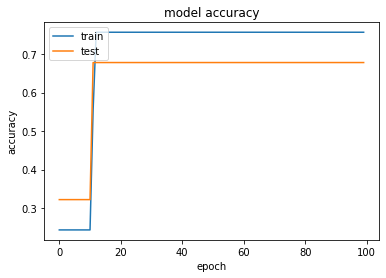

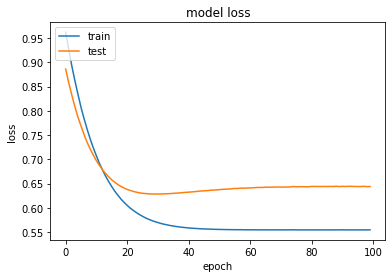

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()